## Decision Trees, Random Forest, and PANDAS

Today we are going to start by discussing a new "core" package, PANDAS! This will help us hold a wide variety of data going forward, which will be particularly helpful later on when we deal with categorical data in the case of binary classification and decision trees.

There are lots of notes available online, here is the one I'm basing this lesson on.
[see some notes here](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html)

In [3]:
%pylab inline
import pandas as pd #the new thing!

Populating the interactive namespace from numpy and matplotlib


The basic element is a 'series' which is similar in spirit to a numpy array...

In [9]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Unlike a numpy array, it can hold values with different types though!

In [8]:
s = pd.Series(["cat", 3, 5, np.nan, 6, 8])

s

0    cat
1      3
2      5
3    NaN
4      6
5      8
dtype: object

Of course, these are designed to hold real world data (think sales records, customer reports, etc.) So they have lots of built in structures to hold the relations between different data series.

Multiple dataseries can be held in a dataframe.

In [19]:
dates = pd.date_range('20190801', periods=6) #initializing dates

df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))

In [20]:
df #notice it is displayed all pretty-like!

,A,B,C,D
2019-08-01,-1.639329,0.999367,1.252477,-0.367529
2019-08-02,2.111593,0.094920,-0.431197,-0.658815
2019-08-03,-1.632487,-1.805933,2.153743,-0.374282
2019-08-04,-0.877059,-0.300907,-0.274446,-0.670649
2019-08-05,-0.391000,-0.950031,-0.912538,-0.191893
2019-08-06,-1.125219,0.775422,1.467142,1.559357


In [23]:
df2 = pd.DataFrame({'A': 1.,
     'B': pd.Timestamp('20130102'),
     'C': pd.Series(1, index=list(range(4)), dtype='float32'),
     'D': np.array([3] * 4, dtype='int32'),
      'E': pd.Categorical(["test", "train", "test", "train"]),
      'F': 'python'})

df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,python
1,1.0,2013-01-02,1.0,3,train,python
2,1.0,2013-01-02,1.0,3,test,python
3,1.0,2013-01-02,1.0,3,train,python


In [24]:
df2.dtypes #show combination of types, both numpy and pd

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

### Basic properties/methods of a pandas dataframe

Of course, most dataframes in real life will be very big. In this case we'll use our sample dataframe here to play with some basic commands.

In [26]:
df.head(1) # begining of the dataframe

,A,B,C,D
2019-08-01,-1.639329,0.999367,1.252477,-0.367529


In [27]:
df.tail(1) # end of the dataframe

,A,B,C,D
2019-08-06,-1.125219,0.775422,1.467142,1.559357


In [30]:
df.index, df.columns #see the properties, both indexes and column names

(DatetimeIndex(['2019-08-01', '2019-08-02', '2019-08-03', '2019-08-04',
                '2019-08-05', '2019-08-06'],
               dtype='datetime64[ns]', freq='D'),
 Index(['A', 'B', 'C', 'D'], dtype='object'))

In [34]:
df.to_numpy() #(convert to numpy )

array([[-1.63932893,  0.99936659,  1.25247747, -0.36752887],
       [ 2.11159269,  0.09492043, -0.43119656, -0.65881496],
       [-1.63248676, -1.80593349,  2.15374347, -0.37428155],
       [-0.87705922, -0.30090694, -0.27444633, -0.67064876],
       [-0.3910002 , -0.950031  , -0.91253781, -0.19189337],
       [-1.12521872,  0.77542161,  1.46714207,  1.55935719]])

In [33]:
df.describe() #quick statistics

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.592250,-0.197860,0.542530,-0.117302
std,1.406763,1.061002,1.239980,0.842001
min,-1.639329,-1.805933,-0.912538,-0.670649
25%,-1.505670,-0.787750,-0.392009,-0.587682
50%,-1.001139,-0.102993,0.489016,-0.370905
75%,-0.512515,0.605296,1.413476,-0.235802
max,2.111593,0.999367,2.153743,1.559357


In [36]:
df.sort_values(by='B') #reorder by sorting by an index

,A,B,C,D
2019-08-03,-1.632487,-1.805933,2.153743,-0.374282
2019-08-05,-0.391000,-0.950031,-0.912538,-0.191893
2019-08-04,-0.877059,-0.300907,-0.274446,-0.670649
2019-08-02,2.111593,0.094920,-0.431197,-0.658815
2019-08-06,-1.125219,0.775422,1.467142,1.559357
2019-08-01,-1.639329,0.999367,1.252477,-0.367529


In [37]:
df['A']

2019-08-01   -1.639329
2019-08-02    2.111593
2019-08-03   -1.632487
2019-08-04   -0.877059
2019-08-05   -0.391000
2019-08-06   -1.125219
Freq: D, Name: A, dtype: float64

In [41]:
df[0:2] #numpy-like querrying

,A,B,C,D
2019-08-01,-1.639329,0.999367,1.252477,-0.367529
2019-08-02,2.111593,0.094920,-0.431197,-0.658815


### Basic Querrying data from a dataframe

Lets now think about how to get certain elements from a large dataframe...

In [43]:
print(dates[0]) 
df.loc[dates[0]] #getting elements where index is equal to dates[0]

2019-08-01 00:00:00


A   -1.639329
B    0.999367
C    1.252477
D   -0.367529
Name: 2019-08-01 00:00:00, dtype: float64

In [46]:
df.loc[dates[[0,3,5]]] #getting elements where index is equal to dates[0]

,A,B,C,D
2019-08-01,-1.639329,0.999367,1.252477,-0.367529
2019-08-04,-0.877059,-0.300907,-0.274446,-0.670649
2019-08-06,-1.125219,0.775422,1.467142,1.559357


In [49]:
df.loc['20190802':'20190804', ['A', 'B']] #various slicing and dicing

,A,B
2019-08-02,2.111593,0.094920
2019-08-03,-1.632487,-1.805933
2019-08-04,-0.877059,-0.300907


In [50]:
df.loc[dates[0], 'A'] #getting just one value

-1.6393289330666658

In [51]:
df.iloc[3:5, 0:2] #getting elements by position in dataframe, similar to numpy indexing

,A,B
2019-08-04,-0.877059,-0.300907
2019-08-05,-0.391000,-0.950031


In [52]:
df[df.A > 0] #boolean indexing!

,A,B,C,D
2019-08-02,2.111593,0.09492,-0.431197,-0.658815


In [53]:
df[df > 0] #so much slicing and dicing!

,A,B,C,D
2019-08-01,NaN,0.999367,1.252477,NaN
2019-08-02,2.111593,0.094920,NaN,NaN
2019-08-03,NaN,NaN,2.153743,NaN
2019-08-04,NaN,NaN,NaN,NaN
2019-08-05,NaN,NaN,NaN,NaN
2019-08-06,NaN,0.775422,1.467142,1.559357


## Redefining data

In [60]:
df.at[dates[0], 'A'] = 0 #set data to value

print(df)

                   A         B         C         D
2019-08-01  0.000000  0.999367  1.252477 -0.367529
2019-08-02  2.111593  0.094920 -0.431197 -0.658815
2019-08-03 -1.632487 -1.805933  2.153743 -0.374282
2019-08-04 -0.877059 -0.300907 -0.274446 -0.670649
2019-08-05 -0.391000 -0.950031 -0.912538 -0.191893
2019-08-06 -1.125219  0.775422  1.467142  1.559357


In [61]:
df3 = df.copy()
df3['E'] = ['one', 'one', 'two', 'three', 'four', 'three'] #adding new elements to pandas array

print(df3)

                   A         B         C         D      E
2019-08-01  0.000000  0.999367  1.252477 -0.367529    one
2019-08-02  2.111593  0.094920 -0.431197 -0.658815    one
2019-08-03 -1.632487 -1.805933  2.153743 -0.374282    two
2019-08-04 -0.877059 -0.300907 -0.274446 -0.670649  three
2019-08-05 -0.391000 -0.950031 -0.912538 -0.191893   four
2019-08-06 -1.125219  0.775422  1.467142  1.559357  three


In [62]:
df3[df3['E'].isin(['one', 'four'])] #filtering array

,A,B,C,D,E
2019-08-01,0.000000,0.999367,1.252477,-0.367529,one
2019-08-02,2.111593,0.094920,-0.431197,-0.658815,one
2019-08-05,-0.391000,-0.950031,-0.912538,-0.191893,four


In [63]:
df.loc[:, 'D'] = np.array([5] * len(df)) #reset whole column

print(df)

                   A         B         C  D
2019-08-01  0.000000  0.999367  1.252477  5
2019-08-02  2.111593  0.094920 -0.431197  5
2019-08-03 -1.632487 -1.805933  2.153743  5
2019-08-04 -0.877059 -0.300907 -0.274446  5
2019-08-05 -0.391000 -0.950031 -0.912538  5
2019-08-06 -1.125219  0.775422  1.467142  5


In [70]:
df[df > 0] = -df #making everything negative
print(df)

                   A         B         C  D
2019-08-01  0.000000 -0.999367 -1.252477 -5
2019-08-02 -2.111593 -0.094920 -0.431197 -5
2019-08-03 -1.632487 -1.805933 -2.153743 -5
2019-08-04 -0.877059 -0.300907 -0.274446 -5
2019-08-05 -0.391000 -0.950031 -0.912538 -5
2019-08-06 -1.125219 -0.775422 -1.467142 -5


### dealing with missing data

In [74]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1], 'E'] = 1
print(df1)

                   A         B         C  D    E
2019-08-01  0.000000 -0.999367 -1.252477 -5  1.0
2019-08-02 -2.111593 -0.094920 -0.431197 -5  1.0
2019-08-03 -1.632487 -1.805933 -2.153743 -5  NaN
2019-08-04 -0.877059 -0.300907 -0.274446 -5  NaN


In [75]:
df1.dropna(how='any') #drop missing data

,A,B,C,D,E
2019-08-01,0.000000,-0.999367,-1.252477,-5,1.0
2019-08-02,-2.111593,-0.094920,-0.431197,-5,1.0


In [76]:
df1.fillna(value='cat') # fill in missing data with new value

,A,B,C,D,E
2019-08-01,0.000000,-0.999367,-1.252477,-5,1
2019-08-02,-2.111593,-0.094920,-0.431197,-5,1
2019-08-03,-1.632487,-1.805933,-2.153743,-5,cat
2019-08-04,-0.877059,-0.300907,-0.274446,-5,cat


In [77]:
pd.isna(df1) #boolean array saying if value is missing


,A,B,C,D,E
2019-08-01,False,False,False,False,False
2019-08-02,False,False,False,False,False
2019-08-03,False,False,False,False,True
2019-08-04,False,False,False,False,True


In [85]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
print(s)

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object


In [87]:
print(s.str.lower()) #make everything lowercase

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object


### More analysis

In [78]:
df.mean()

A   -1.022893
B   -0.821097
C   -1.081924
D   -5.000000
dtype: float64

In [79]:
df.mean(1)

2019-08-01   -1.812961
2019-08-02   -1.909427
2019-08-03   -2.648041
2019-08-04   -1.613103
2019-08-05   -1.813392
2019-08-06   -2.091946
Freq: D, dtype: float64

In [81]:
df.apply(lambda x: x.max() - x.min()) #range of each column



A    2.111593
B    1.711013
C    1.879297
D    0.000000
dtype: float64

In [83]:
s = pd.Series(np.random.randint(0, 7, size=10))

print(s)

0    0
1    5
2    3
3    3
4    1
5    0
6    3
7    0
8    4
9    6
dtype: int64


In [84]:
s.value_counts()

3    3
0    3
6    1
5    1
4    1
1    1
dtype: int64

### Merge Dataframes


In [90]:
df = pd.DataFrame(np.random.randn(10, 4))

pieces = [df[:3], df[3:7], df[1:]]

print(df)

          0         1         2         3
0 -0.622902 -1.175257  0.051650  0.449614
1  1.561428 -0.140604 -0.113094 -0.909728
2 -0.020251  0.029719 -0.918565 -1.385080
3  0.278566  0.526175 -0.962445  1.674399
4  1.180237  0.387315 -1.379459  0.491074
5  2.040596 -1.249488  0.225985  1.411426
6  0.161175  0.823573  0.353239  1.023098
7  1.161670 -0.253521 -0.752380 -0.673570
8  0.828883 -0.615758  0.287292  0.340263
9  0.682305  0.270332 -1.054944 -1.064053


In [91]:
pd.concat(pieces)

,0,1,2,3
0,-0.622902,-1.175257,0.051650,0.449614
1,1.561428,-0.140604,-0.113094,-0.909728
2,-0.020251,0.029719,-0.918565,-1.385080
3,0.278566,0.526175,-0.962445,1.674399
4,1.180237,0.387315,-1.379459,0.491074
5,2.040596,-1.249488,0.225985,1.411426
6,0.161175,0.823573,0.353239,1.023098
1,1.561428,-0.140604,-0.113094,-0.909728
2,-0.020251,0.029719,-0.918565,-1.385080
3,0.278566,0.526175,-0.962445,1.674399


### Built in Plotting


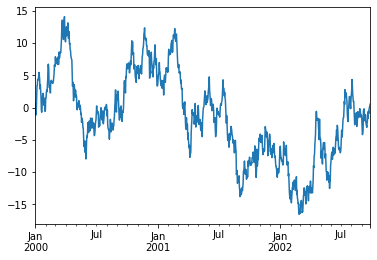

In [96]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2000', periods=1000),)

ts = ts.cumsum()

ts.plot()

<Figure size 432x288 with 0 Axes>

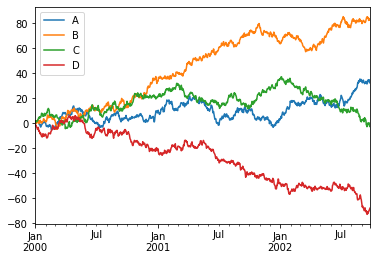

In [100]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                 columns=['A', 'B', 'C', 'D'])


df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc='best')

## Decision Trees



Continuing our exploration of classificiation algorithms, we will return to some supervised learning algorithms! Decision trees are a fairly natural choice from a human logical understanding, as they break down classification into a number of binary choices. I remember learning about this kind of decision tree in the case of identifying wild-life as Dichotomous Key. 

![Dichotomous Key](dichotomous.jpeg "key")


Of course in this case we need to be fancier than mearly making our own decisions like a biologist, and use a more rigorous way to decide how to make each split. In this lesson we will figure out how to best define each split.

Other types of decisions:


1) Which drug is best for a particular patient.

2) Is a cancerous cell malignant on benign?

3) Is an email message spam or not?

[see some other readings here](https://www.datacamp.com/community/tutorials/decision-tree-classification-python)

## Basic Algorithm

1) Select the best attribute using Attribute Selection Measures(ASM) to split the records.

2) Make that attribute a decision node and breaks the dataset into smaller subsets.

3) Starts tree building by repeating this process recursively for each child until one of the condition will match:

* All the tuples belong to the same attribute value.
* There are no more remaining attributes.
* There are no more instances.

## Attribute Selection Measures

At each split we want a rigorous way to define how we split the data. We try to select the attribute which maximizes some measure of "information" or "entropy."

'In physics and mathematics, entropy referred as the randomness or the impurity in the system. In information theory, it refers to the impurity in a group of examples. Information gain is the decrease in entropy. Information gain computes the difference between entropy before split and average entropy after split of the dataset based on given attribute values.'


In [101]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [112]:
import pandas as pd


col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)


In [115]:
pima = pima[1:]

In [116]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [119]:

from sklearn.model_selection import train_test_split # Import train_test_split function

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [124]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [125]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7532467532467533


### Visualizing the Output

Note this requires a new package, if you are using CONDA I would try the following command;

conda install python-graphviz


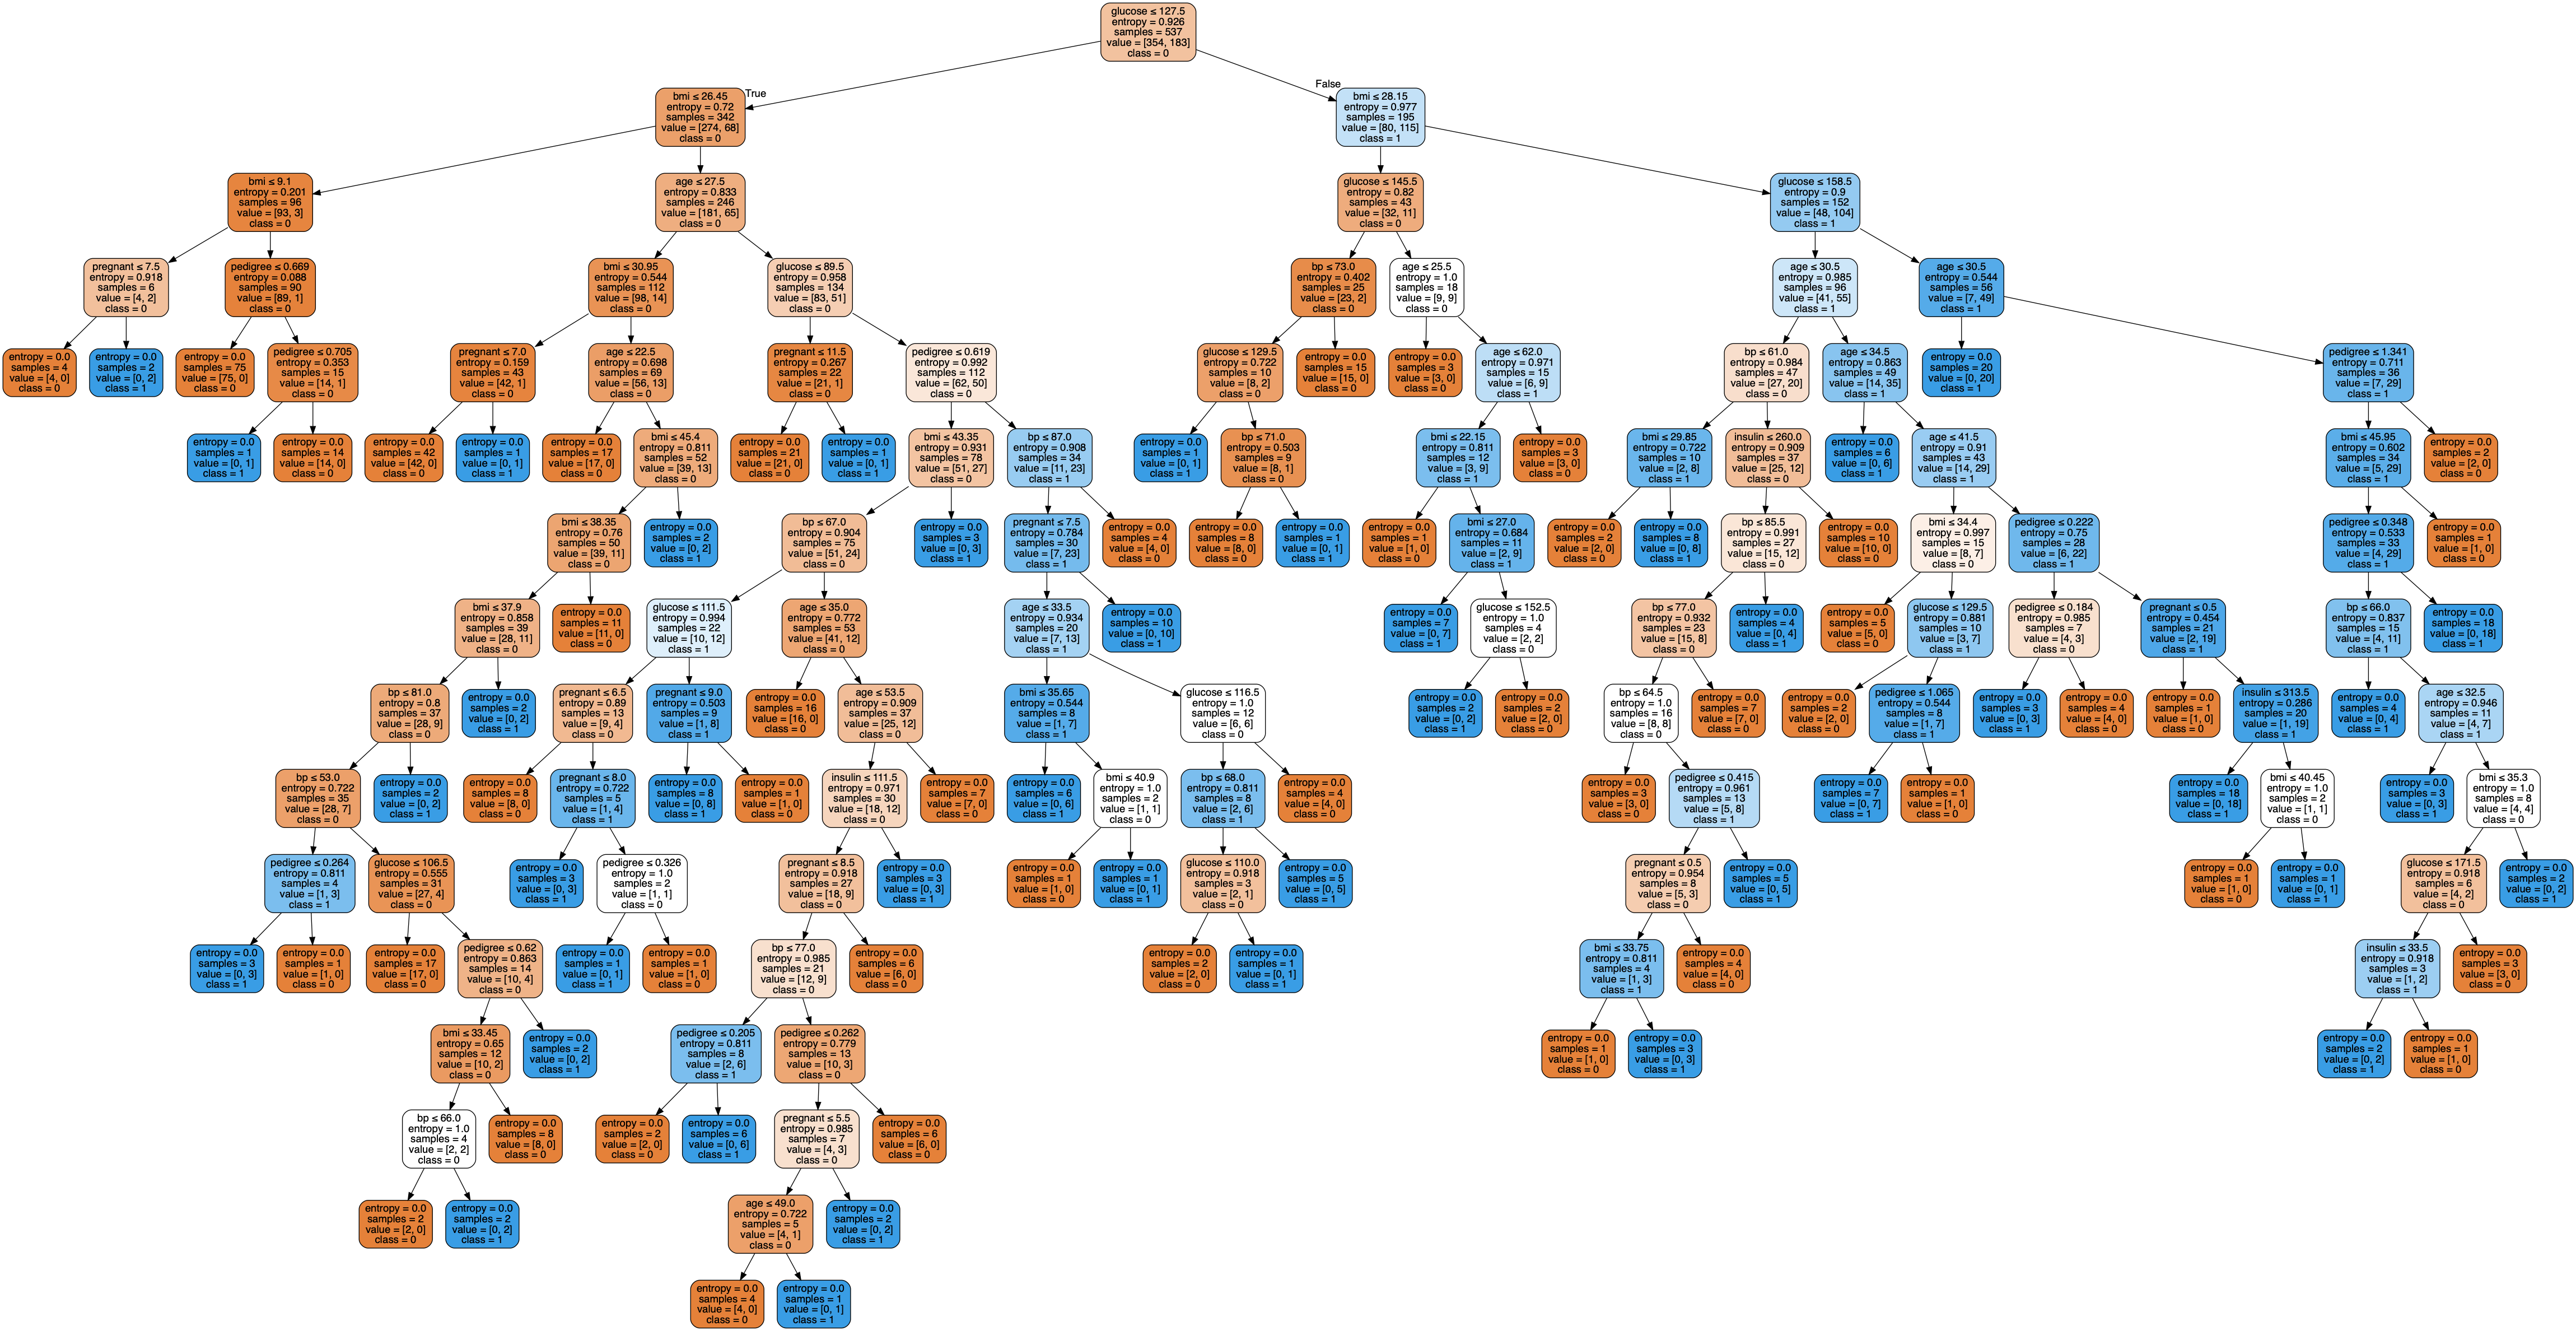

In [126]:
#visualizing the graph

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

Pretty huge! Lets try a smaller graph...


In [130]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


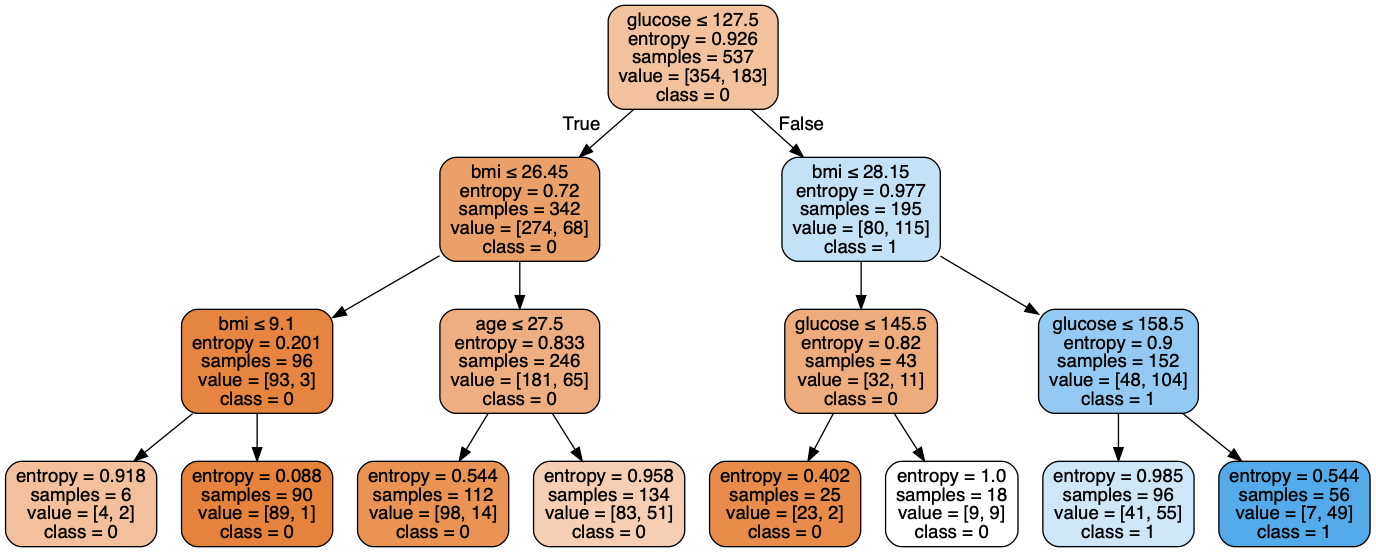

In [131]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

Very easy to undestand now!

## Summary

(From above reading)

#### Pros
Decision trees are easy to interpret and visualize.

It can easily capture Non-linear patterns.

It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.

It can be used for feature engineering such as predicting missing values, suitable for variable selection.

The decision tree has no assumptions about distribution because of the non-parametric nature of the algorithm. (Source)

##### Cons
Sensitive to noisy data. It can overfit noisy data.

The small variation(or variance) in data can result in the different decision tree. This can be reduced by bagging and boosting algorithms.

Decision trees are biased with imbalance dataset, so it is recommended that balance out the dataset before creating the decision tree.

### Random Forest

A random forest is a generalization of a decision tree. Rather than making one tree, the algorithm creates a number of trees (the namesake forest) which decide on the classification as a ensemble average.

Important in this is the aspect that the trees should really be independent and uncorrelated. A forest of identical trees would give the same answer. There are a number of ways to generate such trees.

For today we will focus on the "bootstrap aggregation" technique which makes one weakness of decision trees, sensitivity to initial datasets, its strength. We will randomly sample the dataset with each tree, allowing it to only see part of the data. 

In [141]:
# Create Decision Tree classifer object
from sklearn.ensemble import RandomForestClassifier # Import Decision Tree Classifier

clf = RandomForestClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7965367965367965


/Users/benjaminhorowitz/Library/Python/3.7/lib/python/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


A bit more accurate, but we do loose some "explainability"...